In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import warnings
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, RFECV
import statsmodels.api as sm


import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances

    
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
# def rmse(x,y):
#     return np.sqrt(MSE(x,y))

def rmse(y_true, y_pred):
    se = (y_true - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)


In [147]:
df0 = pd.read_csv('kc_house_data.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


<B>remove outliers

In [3]:
df0 = pd.read_csv('kc_house_data.csv')
#removoe oultliers: renovation year 2015, sold year 2015
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)
X = df0.drop(columns=['id','date'])

<B>Basic info

<B>BASIC MOUDLE: average

In [4]:
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)
a = df0
a['mean_price'] = df0['price'].mean()
print('mean mse:',MSE(df0[['price']],a['mean_price']))

X = df0.drop(columns=['id','price','date'])
y = df0[['price']]
X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.3)
z = y_train['price'].mean()

y_test['predict_price_basic'] = z
#print('mean mse-only test:',MSE(y_test['price'],y_test['predict_price_basic']))

mean mse: 134863515318.2848


<B>BASIC MODEL: all features

In [5]:
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)
X = df0.drop(columns=['id','price','date'])
y = df0[['price']]
X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.3)

#basic
lr0 = LinearRegression().fit(X_train0,y_train)
y_train['predict_price_basic'] = lr0.predict(X_train0)
print('train rmse:',int(rmse(y_train['predict_price_basic'],y_train['price'])))

y_test['predict_price_basic'] = lr0.predict(X_test0)
print('test rmse:',int(rmse(y_test['predict_price_basic'],y_test['price'])))

#ridge
lr0_ridge = linear_model.Ridge(alpha=1).fit(X_train0,y_train)
lr0_ridge
y_train['predict_price_basic'] = lr0_ridge.predict(X_train0)
print('train_ridge rmse:',int(rmse(y_train['predict_price_basic'],y_train['price'])))

y_test['predict_price_basic'] = lr0_ridge.predict(X_test0)
print('test ridge rmse:',int(rmse(y_test['predict_price_basic'],y_test['price'])))

train rmse: 202182
test rmse: 201097
train_ridge rmse: 202186
test ridge rmse: 201135


<B>regression model: with sqft_living+view+grade (features with best corr)

In [6]:
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)
X = df0[['sqft_living','view','grade']]
y = df0[['price']]
X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)

lr0 = LinearRegression().fit(X_train0,y_train)

y_train['predict_price_basic'] = lr0.predict(X_train0)

print('train rmse:',int(rmse(y_train['predict_price_basic'],y_train['price'])))

y_test['predict_price_basic'] = lr0.predict(X_test0)

print('test rmse:',int(rmse(y_test['predict_price_basic'],y_test['price'])))

train rmse: 238547
test rmse: 243196


<B><span style="color:red">Conclusion:we need more features</span>

<B>zipcode influance

<B><span style="color:red">hypothesis: zipcode probably have big effect.
    in realestate the most important feature is...LOCATION LOCATION LOCATION'</span>

Text(0.5, 1.0, 'squre foot living VS price, explained by zipcode')

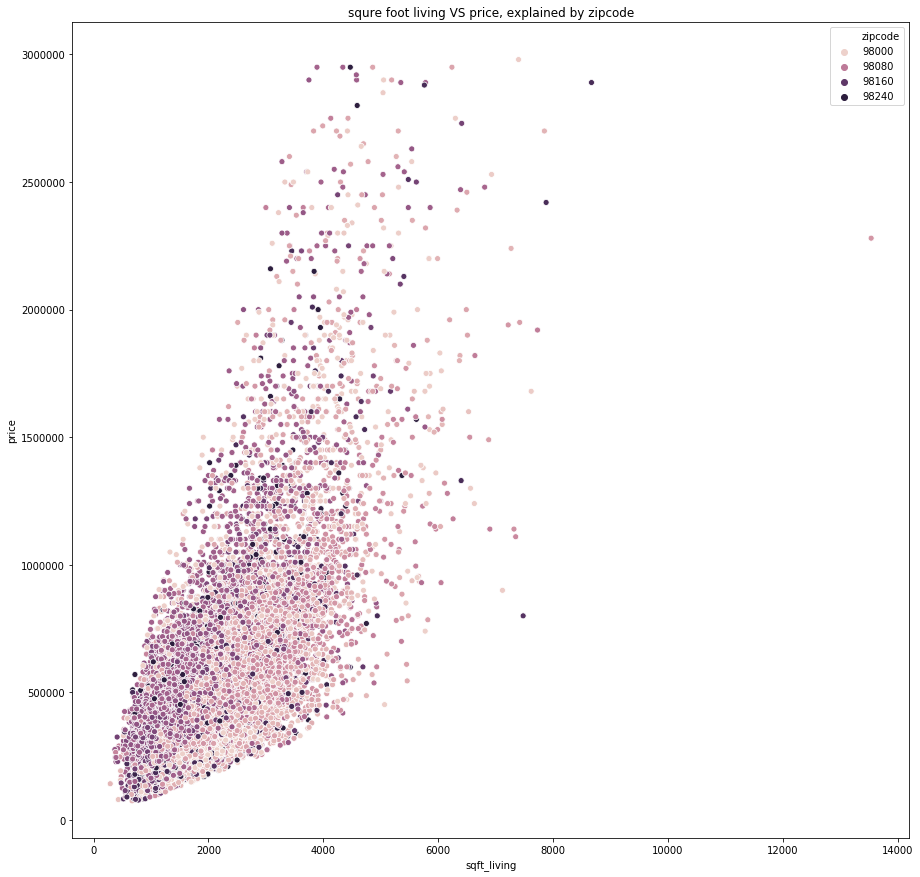

In [351]:
plt.figure(figsize=(15,15))
df0['price'][df0['price']>3000000]
sns.scatterplot(x=df0['sqft_living'][df0['price']<3000000],y=df0['price'][df0['price']<3000000],hue=df0['zipcode']).set_title('squre foot living VS price, explained by zipcode')

<B>zipcode as dummy variable

In [7]:
df0 = pd.read_csv('kc_house_data.csv')
#removoe oultliers: renovation year 2015, sold year 2015
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)

df1 = df0

df1 = pd.get_dummies(data=df0,columns=['zipcode'],drop_first=True)

 
X = df1.drop(columns=['price','date','id','lat','long'])
y = df0[['price']]

X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)

lr0 = LinearRegression().fit(X_train0,y_train)

y_train['predict_price_basic'] = lr0.predict(X_train0)
print('train:',int(rmse(y_train['predict_price_basic'],y_train['price'])))

y_test['predict_price_basic'] = lr0.predict(X_test0)

print('test:',int(rmse(y_test['predict_price_basic'],y_test['price'])))


lr0_ridge = linear_model.Ridge(alpha=1).fit(X_train0,y_train)
y_train['predict_price_basic'] = lr0_ridge.predict(X_train0)
print('train Ridge rmse:',int(rmse(y_train['predict_price_basic'],y_train['price'])))

y_test['predict_price_basic'] = lr0_ridge.predict(X_test0)
print('test Ridge rmse:',int(rmse(y_test['predict_price_basic'],y_test['price'])))

lr0_Lasso = linear_model.Lasso().fit(X_train0,y_train)
y_train['predict_price_basic'] = lr0_Lasso.predict(X_train0)
print('train Lasso:',int(rmse(y_train['predict_price_basic'],y_train['price'])))

y_test['predict_price_basic'] = lr0_Lasso.predict(X_test0)
print('test Lasso:',int(rmse(y_test['predict_price_basic'],y_test['price'])))

train: 161705
test: 158554
train Ridge rmse: 161824
test Ridge rmse: 158691
train Lasso: 161706
test Lasso: 158551


<B><span style="color:red">conclusion: zipcode is very relevant feature</span>

<B>zipcode as dummy+multicolinear

In [8]:
df0 = pd.read_csv('kc_house_data.csv')
#removoe oultliers: renovation year 2015, sold year 2015
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)


df1 = pd.get_dummies(data=df0,columns=['zipcode'],drop_first=True)
for col in df1.columns:
    if col.startswith('zip'):
        z = f'{col}*sqft_living'
        df1[z] = df1['sqft_living']*df1[col]
 
X = df1.drop(columns=['price','date','id','lat','long'])
y = df1[['price']]

X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)

lr0 = LinearRegression().fit(X_train0,y_train)

y_train['predict_price_basic'] = lr0.predict(X_train0)
print('train:',int(rmse(y_train['predict_price_basic'],y_train['price'])))

y_test['predict_price_basic'] = lr0.predict(X_test0)

print('test:',int(rmse(y_test['predict_price_basic'],y_test['price'])))


lr0_ridge = linear_model.Ridge(alpha=1).fit(X_train0,y_train)
y_train['predict_price_basic'] = lr0_ridge.predict(X_train0)
print('train Ridge:',int(rmse(y_train['predict_price_basic'],y_train['price'])))

y_test['predict_price_basic'] = lr0_ridge.predict(X_test0)
print('test Ridge:',int(rmse(y_test['predict_price_basic'],y_test['price'])))

lr0_Lasso = linear_model.Lasso().fit(X_train0,y_train)
y_train['predict_price_basic'] = lr0_Lasso.predict(X_train0)
print('train Lasso:',int(rmse(y_train['predict_price_basic'],y_train['price'])))

y_test['predict_price_basic'] = lr0_Lasso.predict(X_test0)
print('test Lasso:',int(rmse(y_test['predict_price_basic'],y_test['price'])))


train: 132255
test: 137143
train Ridge: 132270
test Ridge: 136915
train Lasso: 132256
test Lasso: 137128


<B>
<span style="color:red">conclusion: zipcode will be a  dummy+multicolinear feature</span>

<B>TRY LOG IN sqft_living

<B>
<span style="color:red">hypothesis: maybe log create better linear connections</span>

Text(0.5, 1.0, 'WITTOUT LOG: squre foot living VS price, explained by zipcode')

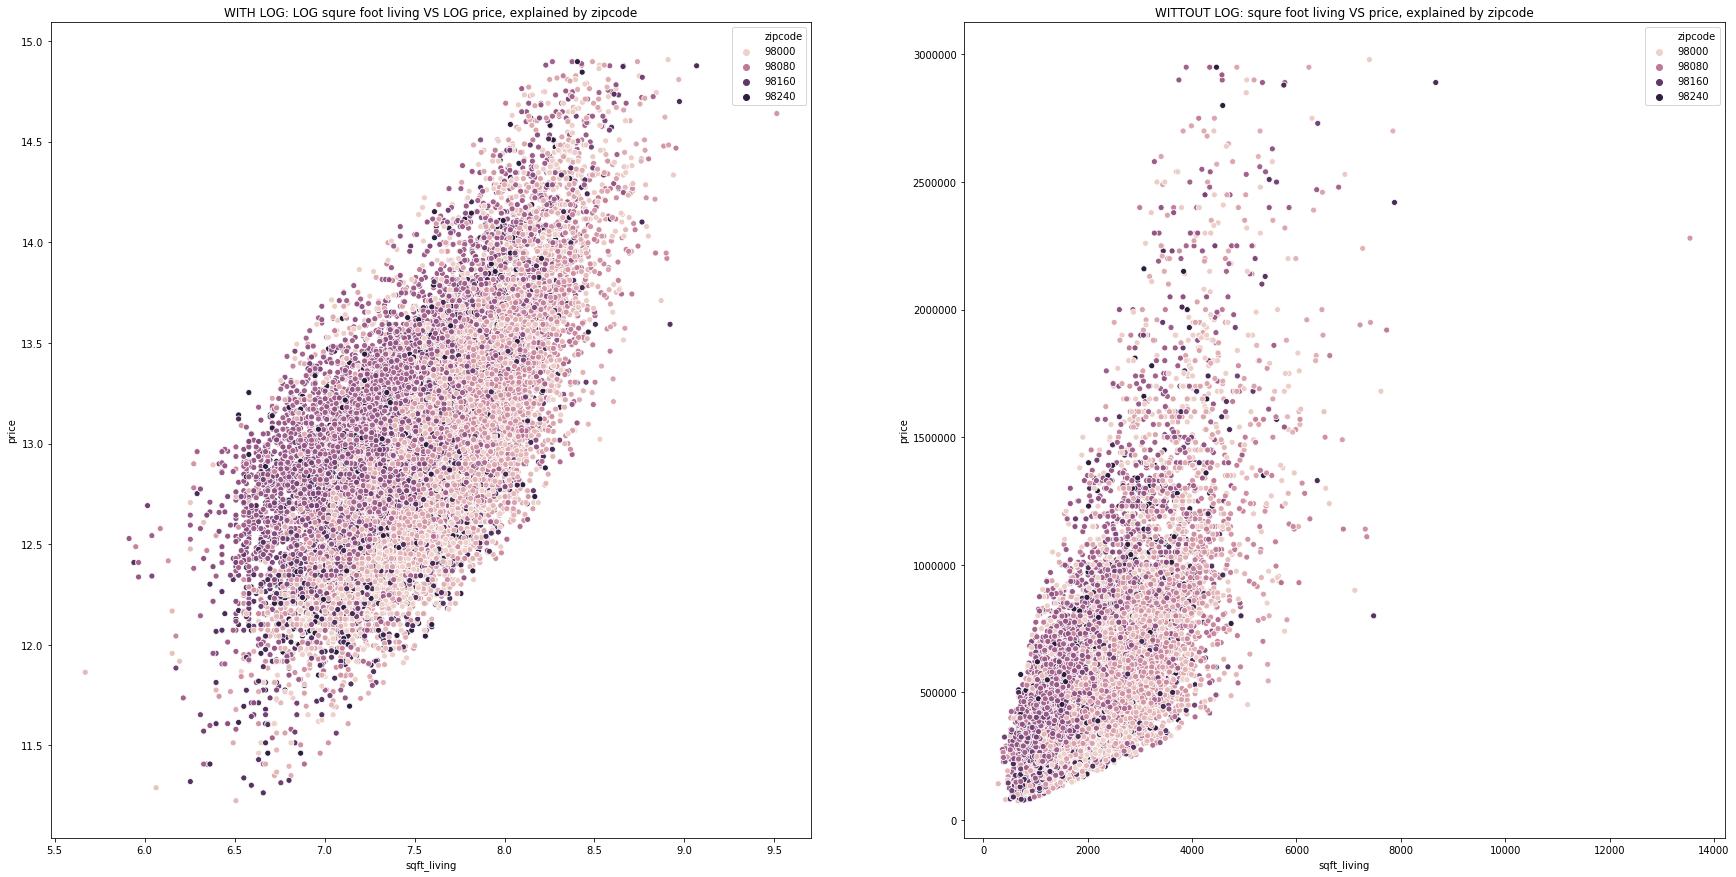

In [367]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(30,15)

#plt.figure(figsize=(10,10))
df0['price'][df0['price']>3000000]
sns.scatterplot(x=np.log(df0['sqft_living'][df0['price']<3000000]),y=np.log(df0['price'][df0['price']<3000000]),hue=df0['zipcode'],ax=axes[0]).set_title('WITH LOG: LOG squre foot living VS LOG price, explained by zipcode')
sns.scatterplot(x=(df0['sqft_living'][df0['price']<3000000]),y=(df0['price'][df0['price']<3000000]),hue=df0['zipcode'],ax=axes[1]).set_title('WITTOUT LOG: squre foot living VS price, explained by zipcode')

<B>LOG WITH zipcode as dummy+multicolinear

In [9]:
#LOG with all SQFT in log
df0 = pd.read_csv('kc_house_data.csv')
#removoe oultliers: renovation year 2015, sold year 2015
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)


df1 = df0
#add the log of sqft_living
df1['log_sqft_living'] = np.log(df1['sqft_living'])
df1['log_sqft_lot'] = np.log(df1['sqft_lot'])
df1['log_sqft_above'] = np.log(df1['sqft_above'])
#df1['sqft_basement'] = np.log(df1['sqft_basement'])
df1['log_price'] = np.log(df1['price'])

df1 = pd.get_dummies(data=df0,columns=['zipcode'],drop_first=True)
for col in df1.columns:
    if col.startswith('zip'):
        z = f'{col}*sqft_living'
        df1[z] = df1['log_sqft_living']*df1[col]

X = df1.drop(columns=['price','date','id','lat','long','sqft_living','sqft_lot','sqft_above','log_price',])



y = df1[['log_price']]

X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)

lr0 = LinearRegression().fit(X_train0,y_train)



y_train['log_predict_price_basic'] = lr0.predict(X_train0)
print('train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))

y_test['log_predict_price_basic'] = lr0.predict(X_test0)
print('test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))

#riedge
lr0_riedge = linear_model.Ridge(alpha=1).fit(X_train0,y_train)
y_train['log_predict_price_basic'] = lr0.predict(X_train0)
print('ridge train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))

y_test['log_predict_price_basic'] = lr0.predict(X_test0)
print('ridge test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))

#Lasso
lr0_lasso = linear_model.Lasso(alpha=1).fit(X_train0,y_train)
y_train['log_predict_price_basic'] = lr0_lasso.predict(X_train0)
print('lasso train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))

y_test['log_predict_price_basic'] = lr0_lasso.predict(X_test0)
print('lasso test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))
#print(list(zip(lr0_lasso.coef_,lr0_lasso_features)))
#print(list(zip(X.columns, lr0_lasso.coef_)))

#a = pd.DataFrame(list(zip(X_train0.columns, lr0_lasso.coef_)))
#a.to_csv('dg.csv')
#[('intercept', pred_p2.intercept_)] + list(zip(X.columns, pred_p2.coef_))
# model_1 = linear_model.LinearRegression()
# model_1.fit(train_data[model_1_features], train_data['price'])
# print(list(zip(model_1.coef_, model_1_features)))
#print(list(zip(lr0.coef_,X_train0.columns,)))

train: 123446.25534536329
test: 119520.33281708832
ridge train: 123446.25534536329
ridge test: 119520.33281708832
lasso train: 281241.30145854404
lasso test: 281273.7553943697


<B>
<span style="color:red">conclusion: log of sqft is a good feature</span>
   


<B>
<span style="color:red">conclusion: we will not use lasso</span>


<B>YEAR FROM BUILD OR RENOVATE


<B>
<span style="color:red">hypothesis: house age (year sold-max(year build) or max(year renovated) impact the price</span>


Text(0.5, 1.0, 'LOG squre foot living VS LOG price, explained by house age')

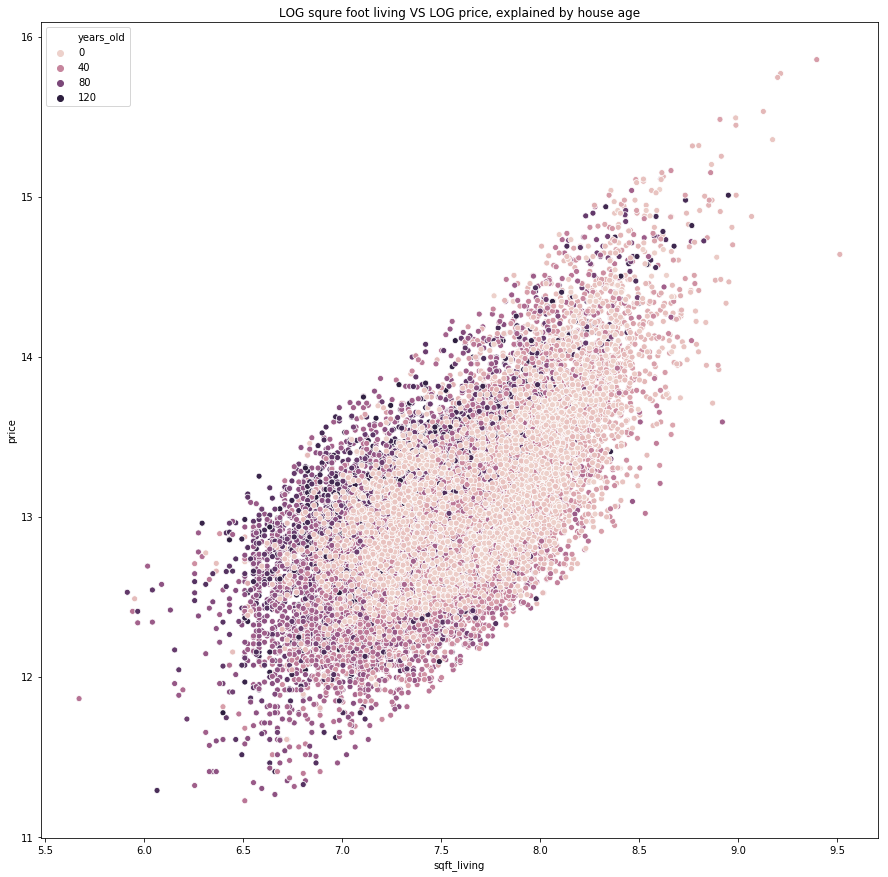

In [361]:
df0 = pd.read_csv('kc_house_data.csv')
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)
df1 = df0

df1['years_old'] = df1['date'].str[0:4].apply(pd.to_numeric)-df1[['yr_renovated','yr_built']].max(axis=1).apply(pd.to_numeric)
plt.figure(figsize=(15,15))
sns.scatterplot(x=np.log(df1['sqft_living']),y=np.log(df1['price']),hue=df1['years_old']).set_title('LOG squre foot living VS LOG price, explained by house age')

In [10]:
#with house age
df0 = pd.read_csv('kc_house_data.csv')
#removoe oultliers: renovation year 2015, sold year 2015
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)


df1 = df0
#how old is the house
df1['years_old'] = df1['date'].str[0:4].apply(pd.to_numeric)-df1[['yr_renovated','yr_built']].max(axis=1).apply(pd.to_numeric)

#add the log of sqft_living
df1['log_sqft_living'] = np.log(df1['sqft_living'])
df1['log_sqft_lot'] = np.log(df1['sqft_lot'])
df1['log_sqft_above'] = np.log(df1['sqft_above'])
#df1['sqft_basement'] = np.log(df1['sqft_basement'])
df1['log_price'] = np.log(df1['price'])

df1 = pd.get_dummies(data=df0,columns=['zipcode'],drop_first=True)
for col in df1.columns:
    if col.startswith('zip'):
        z = f'{col}*sqft_living'
        df1[z] = df1['log_sqft_living']*df1[col]

X = df1.drop(columns=['price','date','id','lat','long','sqft_living','sqft_lot','sqft_above','log_price',])



y = df1[['log_price']]

X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)

lr0 = LinearRegression().fit(X_train0,y_train)

y_train['log_predict_price_basic'] = lr0.predict(X_train0)
print('train rmse:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))

y_test['log_predict_price_basic'] = lr0.predict(X_test0)
print('test rmse:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))

#riedge
lr0 = linear_model.Ridge(alpha=1).fit(X_train0,y_train)
y_train['log_predict_price_basic'] = lr0.predict(X_train0)
print('riedge train rmse:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))

y_test['log_predict_price_basic'] = lr0.predict(X_test0)
print('riedge test rmse:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))

# #Lasso
# lr0 = linear_model.Lasso(alpha=1).fit(X_train0,y_train)
# y_train['log_predict_price_basic'] = lr0.predict(X_train0)
# print('train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))

# y_test['log_predict_price_basic'] = lr0.predict(X_test0)
# print('test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))

train rmse: 123444.18940758052
test rmse: 119519.99529314044
riedge train rmse: 124518.98816002037
riedge test rmse: 119375.32707893623



<B>
<span style="color:red">conclusion: house age feature did not helped</span>


<B>TRY cordenates as clusters:

                                                                    
<B>
<span style="color:red">hypothesis: zipcode is not enough for location data. we need to create better location feature based on coordinates
</span>
   <br>                                                                
<B>
<span style="color:red">we will use KMeans model to predict cordenates clusters of same locations</span>



Text(0.5, 1.0, 'LOG squre foot living VS LOG price, explained by clusterd of proximity')

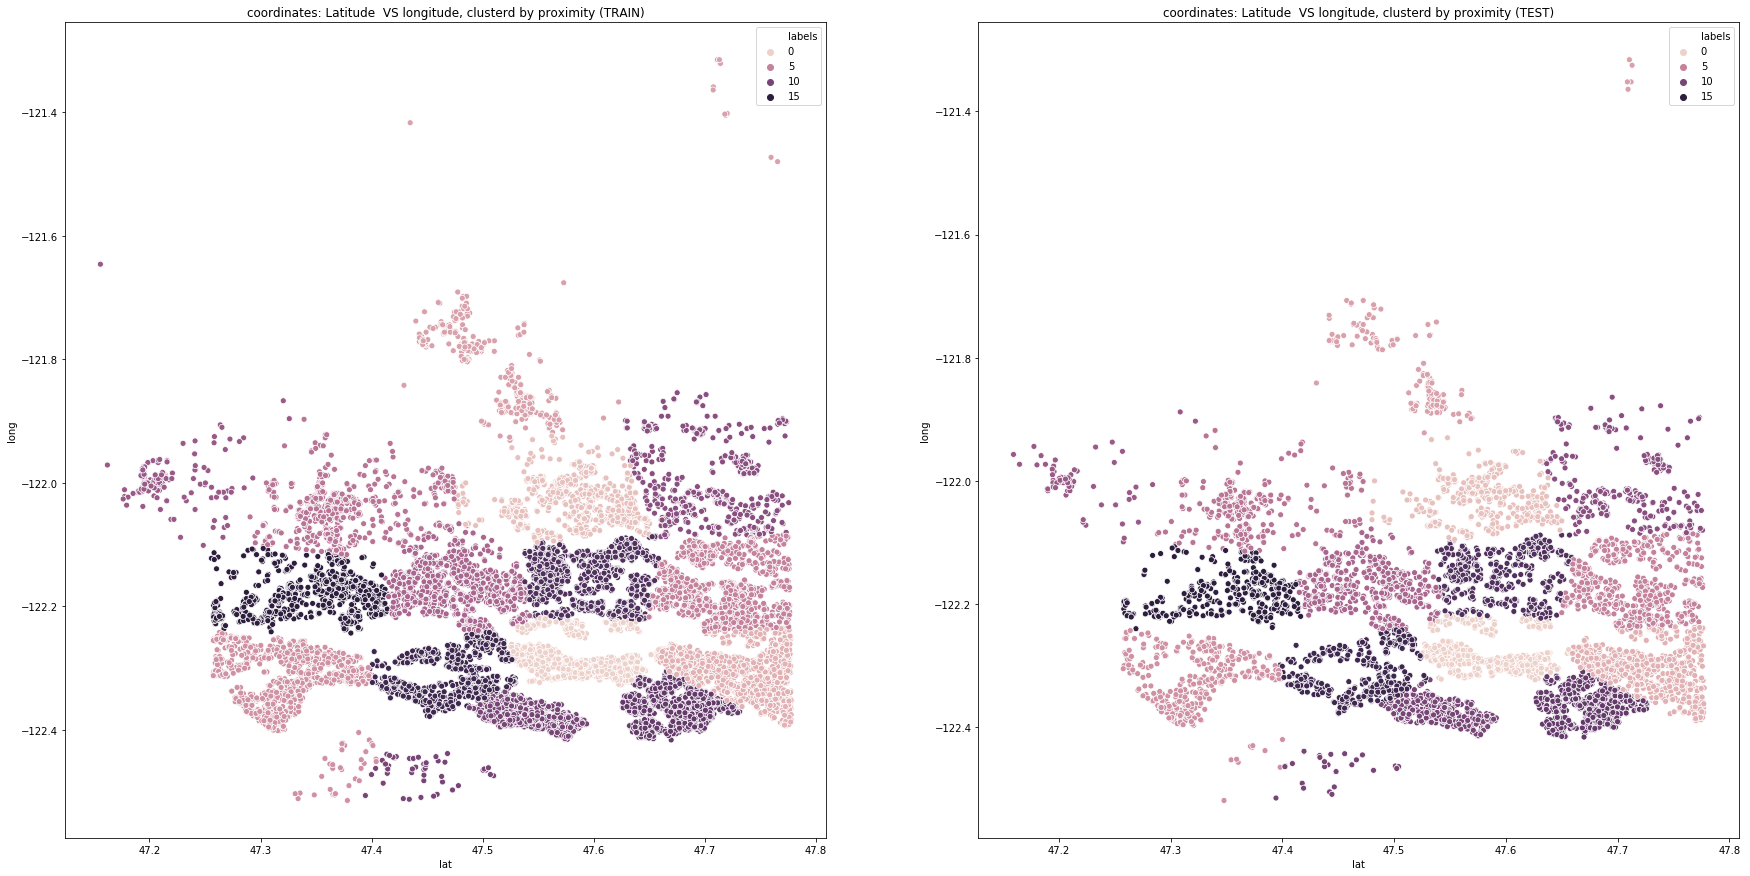

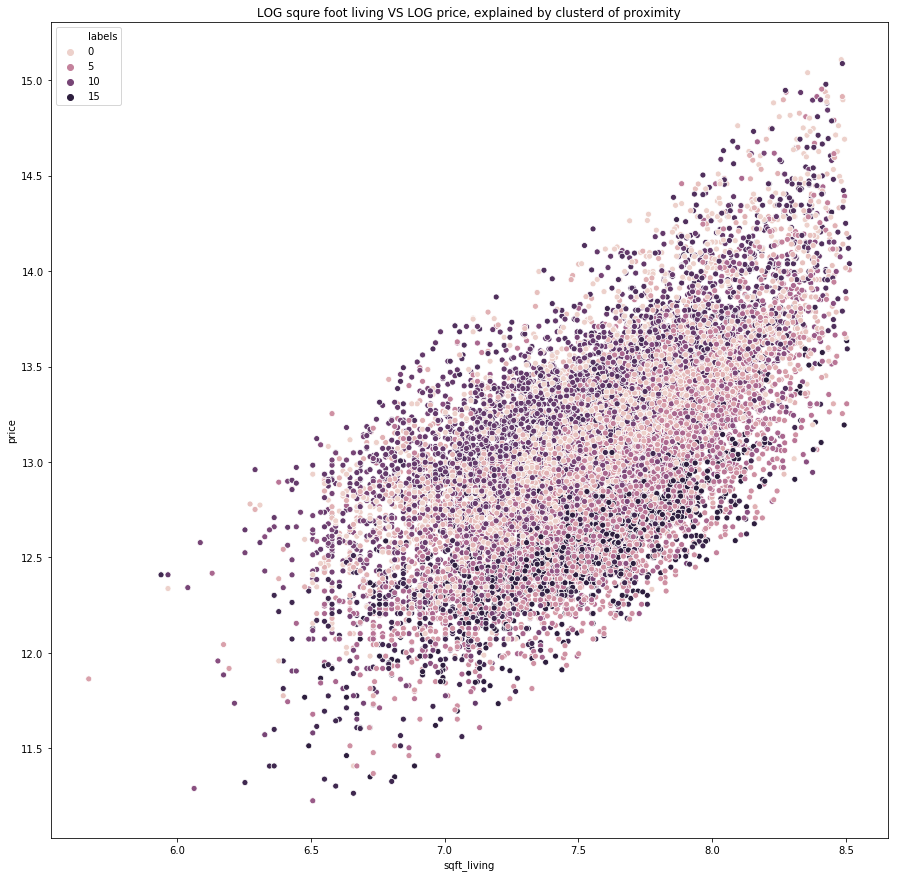

In [11]:
df0 = pd.read_csv('kc_house_data.csv')
#removoe oultliers: renovation year 2015, sold year 2015
df0.drop(df0.index[[2295, 7097, 11599, 14859, 15687, 18575]])

i=15
df1 = df0
y = df1[['price']]
X = df1
X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)

#kmeans model: cluster by coordinates/location 
coordinates = np.array(X_train0[['lat', 'long']])
kmeans= KMeans(n_clusters=i,random_state=0).fit(coordinates)
centeroids = kmeans.cluster_centers_
labels = kmeans.labels_
X_train0['labels'] = labels
X_test0['labels'] = kmeans.predict(np.array(X_test0[['lat', 'long']]))

#add the log of sqft_living
df1['log_sqft_living'] = np.log(df1['sqft_living'])
df1['log_sqft_lot'] = np.log(df1['sqft_lot'])
df1['log_sqft_above'] = np.log(df1['sqft_above'])
#df1['sqft_basement'] = np.log(df1['sqft_basement'])
df1['log_price'] = np.log(df1['price'])


fig, axes = plt.subplots(1, 2)
fig.set_size_inches(30,15)


#plt.figure(figsize=(10,10))
sns.scatterplot(x=X_train0['lat'],y=X_train0['long'],hue=X_train0['labels'],ax=axes[0]).set_title('coordinates: Latitude  VS longitude, clusterd by proximity (TRAIN)')

#plt.figure(figsize=(10,10))
sns.scatterplot(x=X_test0['lat'],y=X_test0['long'],hue=X_test0['labels'],ax=axes[1]).set_title('coordinates: Latitude  VS longitude, clusterd by proximity (TEST)')
plt.figure(figsize=(15,15))
sns.scatterplot(x=np.log(X_train0['sqft_living'][X_train0['sqft_living']<5000]),y=np.log(X_train0['price']),hue=X_train0['labels']).set_title('LOG squre foot living VS LOG price, explained by clusterd of proximity')

<B>cordenates cluster-dummy


In [12]:
df0 = pd.read_csv('kc_house_data.csv')
#removoe oultliers: renovation year 2015, sold year 2015
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)


#numbers of clusters
linear_rmse = []
ridge_rmse = []
lasso_rmse = []
a = []
all2=[]


for i in range(62,63):
#476 is best
    df1 = df0
#how old is the house
#   df1['years_old'] = df1['date'].str[0:4].apply(pd.to_numeric)-df1[['yr_renovated','yr_built']].max(axis=1).apply(pd.to_numeric)

#add the log of sqft_living
    df1['log_sqft_living'] = np.log(df1['sqft_living'])
    df1['log_sqft_lot'] = np.log(df1['sqft_lot'])
    df1['log_sqft_above'] = np.log(df1['sqft_above'])
#df1['sqft_basement'] = np.log(df1['sqft_basement'])
    df1['log_price'] = np.log(df1['price'])

    df1 = pd.get_dummies(data=df0,columns=['zipcode'],drop_first=True)
    for col in df1.columns:
        if col.startswith('zip'):
            z = f'{col}*sqft_living'
            df1[z] = df1['log_sqft_living']*df1[col]


##########################
#NEW-KMEANS PREDICT
##########################
    X = df1.drop(columns=['price','date','id','sqft_living','sqft_lot','sqft_above','log_price',])
    y = df1[['log_price']]
    X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)
#kmeans model: cluster by coordinates/location 
    coordinates = np.array(X_train0[['lat', 'long']])
    X_train0 = X_train0.drop(columns=['lat', 'long'])
    kmeans= KMeans(n_clusters=i,random_state=0).fit(coordinates)
    centeroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    X_train0['labels'] = labels
    coordinates2 = np.array(X_test0[['lat', 'long']])
    X_test0['labels'] = kmeans.predict(coordinates2)
    X_test0 = X_test0.drop(columns=['lat', 'long'])
#kmeans cluster:dummy
    X_train0 = pd.get_dummies(data=X_train0,columns=['labels'],drop_first=True)
    X_test0 = pd.get_dummies(data=X_test0,columns=['labels'],drop_first=True)
    #for colum_t in x_train0.columns
    a = []
    for col in X_train0.columns:
        if col not in X_test0.columns:
            X_test0[col] = 0


#regular
    lr0 = LinearRegression().fit(X_train0,y_train)
    y_train['log_predict_price_basic'] = lr0.predict(X_train0)
    print('train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))
    a.append(int(rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price']))))

    y_test['log_predict_price_basic'] = lr0.predict(X_test0)
    print('test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))
    a.append(int(rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price']))))
    
#ridge
    lr0 = linear_model.Ridge(alpha=1).fit(X_train0,y_train)
    y_train['log_predict_price_basic'] = lr0.predict(X_train0)
    print('ridge train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))
    a.append(int(rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price']))))

    y_test['log_predict_price_basic'] = lr0.predict(X_test0)
    print('Riedge test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))
    a.append(int(rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price']))))   

# #lasso
#     lr0 = linear_model.Lasso(alpha=1).fit(X_train0,y_train)
#     y_train['log_predict_price_basic'] = lr0.predict(X_train0)
#     a.append(int(rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price']))))

#     y_test['log_predict_price_basic'] = lr0.predict(X_test0)
#     a.append(int(rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price']))))
#     a.append(i)
#     all2.append(a)
#     print(i)
#df_cluster_dummy = pd.DataFrame.from_records(all2,columns=['linear_train_rmse','linear_test_rmse','Ridge_train','Ridge_test','lasso_train','lasso_test','clusters'])
#df_cluster_dummy

train: 119630.18735922957
test: 115968.97555601076
ridge train: 121281.43711377337
Riedge test: 116371.2895371769



<B>
<span style="color:red">conclusion: the cordenates cluster dummy is a good feature</span>


<B>cordenates as clusters+dummy+corelation:

In [64]:
df0 = pd.read_csv('kc_house_data.csv')
#removoe oultliers: renovation year 2015, sold year 2015
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)


#numbers of clusters
linear_rmse = []
ridge_rmse = []
lasso_rmse = []
a = []
all1=[]


for i in range(62,63):
#476 is best
    df1 = df0
#how old is the house
    #df1['years_old'] = df1['date'].str[0:4].apply(pd.to_numeric)-df1[['yr_renovated','yr_built']].max(axis=1).apply(pd.to_numeric)

#add the log of sqft_living
    df1['log_sqft_living'] = np.log(df1['sqft_living'])
    df1['log_sqft_lot'] = np.log(df1['sqft_lot'])
    df1['log_sqft_above'] = np.log(df1['sqft_above'])
#df1['sqft_basement'] = np.log(df1['sqft_basement'])
    df1['log_price'] = np.log(df1['price'])

    df1 = pd.get_dummies(data=df0,columns=['zipcode'],drop_first=True)
    for col in df1.columns:
        if col.startswith('zip'):
            z = f'{col}*sqft_living'
            df1[z] = df1['log_sqft_living']*df1[col]


##########################
#NEW-KMEANS PREDICT
##########################
    X = df1.drop(columns=['price','date','id','sqft_living','sqft_lot','sqft_above','log_price',])
    y = df1[['log_price']]
    X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)
#kmeans model: cluster by coordinates/location 
    coordinates = np.array(X_train0[['lat', 'long']])
    X_train0 = X_train0.drop(columns=['lat', 'long'])
    kmeans= KMeans(n_clusters=i,random_state=0).fit(coordinates)
    centeroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    X_train0['labels'] = labels
    coordinates2 = np.array(X_test0[['lat', 'long']])
    X_test0['labels'] = kmeans.predict(coordinates2)
    X_test0 = X_test0.drop(columns=['lat', 'long'])
#kmeans cluster:dummy
    X_train0 = pd.get_dummies(data=X_train0,columns=['labels'],drop_first=True)
    X_test0 = pd.get_dummies(data=X_test0,columns=['labels'],drop_first=True)
    
    for col in X_train0.columns:
        if col.startswith('lab'):
            z = f'{col}*sqft_living'
            df1[z] = X_train0['log_sqft_living']*X_train0[col]
    for col in X_test0.columns:
        if col.startswith('labe'):
            z = f'{col}*sqft_living'
            df1[z] = X_test0['log_sqft_living']*X_test0[col]    

######################################################
    for col in X_train0.columns:
        if col not in X_test0.columns:
            X_test0[col] = 0

    a = []
    #regular
    lr0 = LinearRegression().fit(X_train0,y_train)
    y_train['log_predict_price_basic'] = lr0.predict(X_train0)
    print('train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))
    a.append(int(rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price']))))

    y_test['log_predict_price_basic'] = lr0.predict(X_test0)
    print('test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))
    a.append(int(rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price']))))
    
#ridge
    lr0 = linear_model.Ridge(alpha=1).fit(X_train0,y_train)
    y_train['log_predict_price_basic'] = lr0.predict(X_train0)
    print('ridge train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))
    a.append(int(rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price']))))

    y_test['log_predict_price_basic'] = lr0.predict(X_test0)
    print('Riedge test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))
    a.append(int(rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price']))))   

# #lasso
#     lr0 = linear_model.Lasso(alpha=1).fit(X_train0,y_train)
#     y_train['log_predict_price_basic'] = lr0.predict(X_train0)
#     a.append(int(rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price']))))

#     y_test['log_predict_price_basic'] = lr0.predict(X_test0)
#     a.append(int(rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price']))))
#     a.append(i)
#     all1.append(a)
#     print(i)
# df_cluster_dummy_intercorelation2 = pd.DataFrame.from_records(all1,columns=['linear_train_rmse','linear_test_rmse','Ridge_train','Ridge_test','lasso_train','lasso_test','clusters'])
# df_cluster_dummy_intercorelation2



train: 119630.18735922957
test: 115968.97555601076
ridge train: 121281.43711377337
Riedge test: 116371.2895371769


<B>
<span style="color:red">conclusion: the cordenates dummy+multicolinear does not help us</span>


<BR>
<B>BASMENT "PUNISH"


<B>
<span style="color:red">the most impotant feature is "sqft_living" and it's equal to square foot above+square foot basement<br>hypothesis: the basment is "worth" per meter less then square foot above <br>
we will "punish" the basment space in our new feature</span>



In [90]:
#punish basment

df0 = pd.read_csv('kc_house_data.csv')
# #removoe oultliers: renovation year 2015, sold year 2015
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)


#numbers of clusters
linear_rmse = []
ridge_rmse = []
lasso_rmse = []
a = []
all1=[]

space = 0.4444
df1 = df0
df1['sqft_living_punish_basment'] = np.log(df1['sqft_above']+df1['sqft_basement']*space)

i=62
#how old is the house
#df1['years_old'] = df1['date'].str[0:4].apply(pd.to_numeric)-df1[['yr_renovated','yr_built']].max(axis=1).apply(pd.to_numeric)

#add the log of sqft_living
df1['log_sqft_living'] = np.log(df1['sqft_living'])
df1['log_sqft_lot'] = np.log(df1['sqft_lot'])
df1['log_sqft_above'] = np.log(df1['sqft_above'])
#df1['sqft_basement'] = np.log(df1['sqft_basement'])
df1['log_price'] = np.log(df1['price'])

df1 = pd.get_dummies(data=df0,columns=['zipcode'],drop_first=True)
for col in df1.columns:
    if col.startswith('zip'):
        z = f'{col}*sqft_living'
        df1[z] = df1['log_sqft_living']*df1[col]


##########################
#NEW-KMEANS PREDICT
##########################
X = df1.drop(columns=['price','date','id','sqft_living','sqft_lot','sqft_above','log_price',])
y = df1[['log_price']]
X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)
#kmeans model: cluster by coordinates/location 
coordinates = np.array(X_train0[['lat', 'long']])
X_train0 = X_train0.drop(columns=['lat', 'long'])
kmeans= KMeans(n_clusters=i,random_state=0).fit(coordinates)
centeroids = kmeans.cluster_centers_
labels = kmeans.labels_

X_train0['labels'] = labels
coordinates2 = np.array(X_test0[['lat', 'long']])
X_test0['labels'] = kmeans.predict(coordinates2)
X_test0 = X_test0.drop(columns=['lat', 'long'])
#kmeans cluster:dummy
X_train0 = pd.get_dummies(data=X_train0,columns=['labels'],drop_first=True)
X_test0 = pd.get_dummies(data=X_test0,columns=['labels'],drop_first=True)

#     for col in X_train0.columns:
#         if col.startswith('lab'):
#             z = f'{col}*sqft_living'
#             df1[z] = X_train0['log_sqft_living']*X_train0[col]
#     for col in X_test0.columns:
#         if col.startswith('labe'):
#             z = f'{col}*sqft_living'
#             df1[z] = X_test0['log_sqft_living']*X_test0[col]    

######################################################

######################################################

#X_train0,X_test0,y_train,y_test = train_test_split(X,y,random_state=0,train_size = 0.7)

a = []
#regular
lr0 = LinearRegression().fit(X_train0,y_train)
y_train['log_predict_price_basic'] = lr0.predict(X_train0)
print('train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))
a.append(int(rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price']))))

y_test['log_predict_price_basic'] = lr0.predict(X_test0)
print('test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))
a.append(int(rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price']))))

#ridge
lr0 = linear_model.Ridge(alpha=1).fit(X_train0,y_train)
y_train['log_predict_price_basic'] = lr0.predict(X_train0)
print('ridge train:',rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price'])))
a.append(int(rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price']))))

y_test['log_predict_price_basic'] = lr0.predict(X_test0)
a.append(int(rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price']))))
print('ridge test:',rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price'])))
      
    

      
      #     #lasso
#         lr0 = linear_model.Lasso(alpha=1).fit(X_train0,y_train)
#         y_train['log_predict_price_basic'] = lr0.predict(X_train0)
#         a.append(int(rmse(np.exp(y_train['log_predict_price_basic']),np.exp(y_train['log_price']))))

#         y_test['log_predict_price_basic'] = lr0.predict(X_test0)
#         a.append(int(rmse(np.exp(y_test['log_predict_price_basic']),np.exp(y_test['log_price']))))
# a.append(0.4444)
# all1.append(a)
# df_cluster_dummy4 = pd.DataFrame.from_records(all1,columns=['linear_train_rmse','linear_test_rmse','Ridge_train','Ridge_test','punish weight'])

train: 119651.14243858765
test: 115898.02411254577
ridge train: 121281.38036466886
ridge test: 116368.66935255648



<B>
<span style="color:red">conclusion: the punish basment is a good feature</span>



<B>more feature that we didn't tested <BR>
* HOW MANY ROOMS TO A BATHROOM: we wanted to do another feature of rooms to a bathroom<BR>
* VIEW: play with this feature. and cheak multicolinear<BR>
*date: we have only one year of data, but we can cheak if:<Br>1. day of the week <BR>2.day of the month <BR>3.holidays or speacial days effects the price

re-trying the diffrent model with the current features without log manipulations

In [111]:
df0 = pd.read_csv('kc_house_data.csv')
# #removoe oultliers: renovation year 2015, sold year 2015
df0 = df0.drop(index=df0[(df0['date'].str[0:4]=='2014')&((df0['yr_built']==2015)|(df0['yr_renovated']==2015))].index)

space = 0.4444
df1 = df0
df1['sqft_living_punish_basment'] = df1['sqft_above']+df1['sqft_basement']*space

#how old is the house
df1['years_old'] = df1['date'].str[0:4].apply(pd.to_numeric)-df1[['yr_renovated','yr_built']].max(axis=1).apply(pd.to_numeric)

#add the log of sqft_living
df_dummies = pd.get_dummies(data=df0,columns=['zipcode'],drop_first=True)

for col in df_dummies:
    if col.startswith('zip'):
        z = f'{col}*sqft_living'
        df_dummies[z] = df_dummies['sqft_living']*df_dummies[col]
        df_dummies = df_dummies.drop(columns=col)     

y = df0['price']
X = df1.drop(columns=['price','date','id','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated','yr_built'])
X_dummies = df_dummies.drop(columns=['price','date','id','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated','yr_built'])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies, y, train_size=0.9, test_size=0.1)

In [129]:
# linear regression
linearRegression_values = []
house_linearRegression_model = LinearRegression().fit(X_train_dummies,y_train_dummies)
linearRegression_values.append(rmse(house_linearRegression_model.predict(X_train_dummies),y_train_dummies))
linearRegression_values.append(rmse(house_linearRegression_model.predict(X_test_dummies),y_test_dummies))

house_linearRegression_model = LinearRegression().fit(X_train,y_train)
linearRegression_values.append(rmse(house_linearRegression_model.predict(X_train),y_train))
linearRegression_values.append(rmse(house_linearRegression_model.predict(X_test),y_test))

                                
# Ridge regression
Ridge_values = []
house_Ridge_linear_model = linear_model.Ridge(alpha=1).fit(X_train_dummies,y_train_dummies)
Ridge_values.append(rmse(house_Ridge_linear_model.predict(X_train_dummies),y_train_dummies))
Ridge_values.append(rmse(house_Ridge_linear_model.predict(X_test_dummies),y_test_dummies))

house_Ridge_linear_model = linear_model.Ridge(alpha=1).fit(X_train,y_train)
Ridge_values.append(rmse(house_Ridge_linear_model.predict(X_train),y_train))
Ridge_values.append(rmse(house_Ridge_linear_model.predict(X_test),y_test))


# lasso regression
Lasso_values = []
house_Lasso_linear_model = linear_model.Lasso(alpha=1).fit(X_train_dummies,y_train_dummies)
Lasso_values.append(rmse(house_Lasso_linear_model.predict(X_train_dummies),y_train_dummies))
Lasso_values.append(rmse(house_Lasso_linear_model.predict(X_test_dummies),y_test_dummies))

house_Lasso_linear_model = linear_model.Lasso(alpha=1).fit(X_train,y_train)
Lasso_values.append(rmse(house_Lasso_linear_model.predict(X_train),y_train)) 
Lasso_values.append(rmse(house_Lasso_linear_model.predict(X_test),y_test))


# DecisionTree
DecisionTree_values = []
house_DecisionTree_model = DecisionTreeRegressor(max_depth=10).fit(X_train_dummies,y_train_dummies)
DecisionTree_values.append(rmse(house_DecisionTree_model.predict(X_train_dummies),y_train_dummies))
DecisionTree_values.append(rmse(house_DecisionTree_model.predict(X_test_dummies),y_test_dummies))

house_DecisionTree_model = DecisionTreeRegressor(max_depth=10).fit(X_train,y_train)
DecisionTree_values.append(rmse(house_DecisionTree_model.predict(X_train),y_train))
DecisionTree_values.append(rmse(house_DecisionTree_model.predict(X_test),y_test))


comparison_dict = {'linear':linearRegression_values,'Ridge':Ridge_values,'Lasso':Lasso_values,'Decision_Tree':DecisionTree_values}
df_comparison = pd.DataFrame.from_dict(comparison_dict, orient='index', columns=['train_dummies','test_dummies','train','test'])

df_comparison.head()



train_dummies   test_dummies          train           test
linear         135481.910794  155507.356686  211065.654497  203774.457973
Ridge          135482.696483  155490.416071  211067.176194  203785.467600
Lasso          135481.914227  155506.267881  211065.655171  203774.452341
Decision_Tree  107191.100617  153875.803539  102252.487249  177349.674407

conclutions: 
a. with alpha equalls 1 , the penelties does not effect the model
b. the best fitting model is the Lasso but not by much
c. the zipcode dummies help the model

for extra validation we will try use cross validation

In [130]:
house_linearRegression_model = LinearRegression().fit(X_train_dummies,y_train_dummies)
house_Ridge_linear_model = linear_model.Ridge(alpha=1).fit(X_train_dummies,y_train_dummies)
house_Lasso_linear_model = linear_model.Lasso(alpha=1).fit(X_train_dummies,y_train_dummies)
house_DecisionTree_model = DecisionTreeRegressor(max_depth=10).fit(X_train_dummies,y_train_dummies)


scores = cross_val_score(house_linearRegression_model,X_train_dummies,y_train_dummies, cv=10,scoring='neg_mean_squared_error')
linearRegression_values.append(np.sqrt(np.abs(scores)).mean())
linearRegression_values.append(rmse(house_linearRegression_model.predict(X_test_dummies),y_test_dummies))


scores = cross_val_score(house_Ridge_linear_model,X_train_dummies,y_train_dummies, cv=10,scoring='neg_mean_squared_error')
Ridge_values.append(np.sqrt(np.abs(scores)).mean())
Ridge_values.append(rmse(house_Ridge_linear_model.predict(X_test_dummies),y_test_dummies))

scores = cross_val_score(house_Lasso_linear_model,X_train_dummies,y_train_dummies, cv=10,scoring='neg_mean_squared_error')
Lasso_values.append(np.sqrt(np.abs(scores)).mean())
Lasso_values.append(rmse(house_Lasso_linear_model.predict(X_test_dummies),y_test_dummies))

scores = cross_val_score(house_DecisionTree_model,X_train_dummies,y_train_dummies, cv=10,scoring='neg_mean_squared_error')
DecisionTree_values.append(np.sqrt(np.abs(scores)).mean())
DecisionTree_values.append(rmse(house_DecisionTree_model.predict(X_test_dummies),y_test_dummies))

comparison_dict = {'linear':linearRegression_values,'Ridge':Ridge_values,'Lasso':Lasso_values,'Decision_Tree':DecisionTree_values }
df_comparison = pd.DataFrame.from_dict(comparison_dict, orient='index', columns=['train_dummies','test_dummies','train','test','cros-val train','cross-val test'])

df_comparison.head()

train_dummies   test_dummies          train           test  \
linear         135481.910794  155507.356686  211065.654497  203774.457973   
Ridge          135482.696483  155490.416071  211067.176194  203785.467600   
Lasso          135481.914227  155506.267881  211065.655171  203774.452341   
Decision_Tree  107191.100617  153875.803539  102252.487249  177349.674407   

               cros-val train  cross-val test  
linear          136941.714720   155507.356686  
Ridge           136940.327160   155490.416071  
Lasso           136941.718782   155506.267881  
Decision_Tree   163455.003859   153254.410967

In [ ]:
conclution: the decision tree cross val test looks optimal

In [136]:
parameters = {"max_depth": range(7,14),
             'min_samples_leaf': [10,20,30,40,50]}
gd = GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,cv=10, return_train_score=False, n_jobs=4, scoring='neg_mean_squared_error')
gd.fit(X_train_dummies,y_train_dummies)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': range(7, 14), 'min_samples_leaf': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_error', verbose=0)

In [132]:
print(gd.best_params_)
np.sqrt(-1*gd.best_score_)

{'max_depth': 13, 'min_samples_leaf': 10}


166013.1755258493

In [170]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)

In [169]:
#testing feature selection via recursive feature elimination 

# house_linear_model = LinearRegression().fit(X_no_zipcode,y)
rfe = RFE(gd.best_estimator_, n_features_to_select=1, step=1)
rfe.fit(X_train_scale, y_train)

len(X_train.columns)
len(rfe.ranking_)
featue_ranking = list(zip(rfe.ranking_,X_train.columns))
featue_ranking.sort()
featue_ranking

[(1, 'grade'),
 (2, 'lat'),
 (3, 'sqft_living_punish_basment'),
 (4, 'long'),
 (5, 'sqft_living15'),
 (6, 'view'),
 (7, 'waterfront'),
 (8, 'sqft_lot15'),
 (9, 'years_old'),
 (10, 'bathrooms'),
 (11, 'condition'),
 (12, 'floors'),
 (13, 'bedrooms')]

using feature selection method via forward selection and adjusted r-squerd

In [139]:
def adjustR_sqrd(R_squrd,n,k):
    return 1 - ((1-R_squrd) * (n-1)/((n-k-1)))

In [164]:

X_train, X_test, y_train, y_test = train_test_split(X_no_zipcode, y, train_size=0.9, test_size=0.1)
# variables for the check
max_adj_r2 = 0
new_train_X = pd.DataFrame()
new_test_X = pd.DataFrame()
feature_dict = {}

for col in [i[1] for i in featue_ranking]:
    new_train_X[col] = X_train[col]
    new_test_X[col] = X_test[col]
    model = DecisionTreeRegressor(max_depth=13,min_samples_leaf=10).fit(new_train_X,y_train)
    R_squrd = r2_score(y_test, model.predict(new_test_X))
    print(f"col {col} r2 {R_squrd}")
    k = len(new_train_X.columns)
    n = len(y)
    adj_r = adjustR_sqrd(R_squrd,n,k)
    if adj_r>max_adj_r2:
        max_adj_r2 = adj_r       
        feature_dict[col] = (R_squrd, adj_r, "relevant")
    else:
        new_train_X = new_train_X.drop(columns=col)
        new_test_X = new_test_X.drop(columns=col)
        feature_dict[col] = (R_squrd, adj_r, "dropped" )

    

df_columns = pd.DataFrame.from_dict(feature_dict, orient='index', columns=['r2','adj_r2','dropped or relevant'])

df_columns.head(15)


col grade r2 0.5016793716011794
col lat r2 0.5985335143312012
col sqft_living_punish_basment r2 0.619187272111682
col long r2 0.7932936410061757
col sqft_living15 r2 0.7801382622422899
col bathrooms r2 0.7740414277659476
col waterfront r2 0.8266052281223412
col view r2 0.8347016047020056
col years_old r2 0.8246644976868169
col sqft_lot15 r2 0.8327363111542802
col condition r2 0.8355657096321175
col floors r2 0.8342580660579442
col bedrooms r2 0.8349891850957797


r2    adj_r2 dropped or relevant
grade                       0.501679  0.501656            relevant
lat                         0.598534  0.598496            relevant
sqft_living_punish_basment  0.619187  0.619134            relevant
long                        0.793294  0.793255            relevant
sqft_living15               0.780138  0.780087             dropped
bathrooms                   0.774041  0.773989             dropped
waterfront                  0.826605  0.826565            relevant
view                        0.834702  0.834656            relevant
years_old                   0.824664  0.824608             dropped
sqft_lot15                  0.832736  0.832682             dropped
condition                   0.835566  0.835512            relevant
floors                      0.834258  0.834197             dropped
bedrooms                    0.834989  0.834928             dropped

In [160]:
model = DecisionTreeRegressor(max_depth=13,min_samples_leaf=10).fit(new_train_X,y_train)
rmse(model.predict(new_test_X),y_test)

140783.79087658983

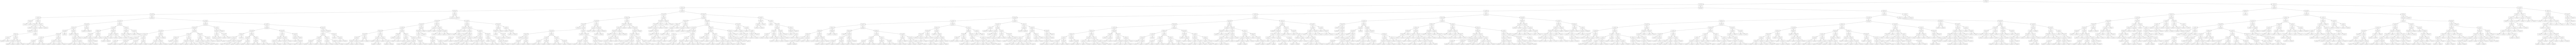

In [162]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data, feature_names=new_test_X.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=600) 

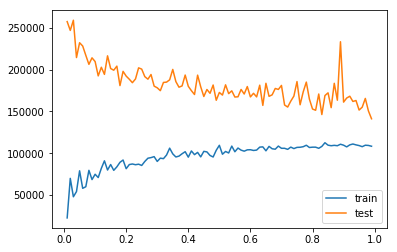

In [163]:
#checking best portion for split the data
portion = np.arange(0.01, 1 ,0.01)

scores = pd.DataFrame(index=portion, columns=['train','test'])

for p in portion:
    X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, train_size=p, test_size=1-p)
    tree_model = DecisionTreeRegressor(max_depth=10)
    tree_model.fit(X_train, y_train)
    y_train_pred = tree_model.predict(X_train)
    y_test_pred = tree_model.predict(X_test)
    
    scores.loc[p,'train'] = rmse(y_train,y_train_pred)
    scores.loc[p,'test'] = rmse(y_test,y_test_pred)
scores.plot()    